## Create Azure DevOps Feed

documentation: https://docs.microsoft.com/en-us/azure/devops/artifacts/quickstarts/python-packages?view=azure-devops&tabs=new-nav&viewFallbackFrom=vsts

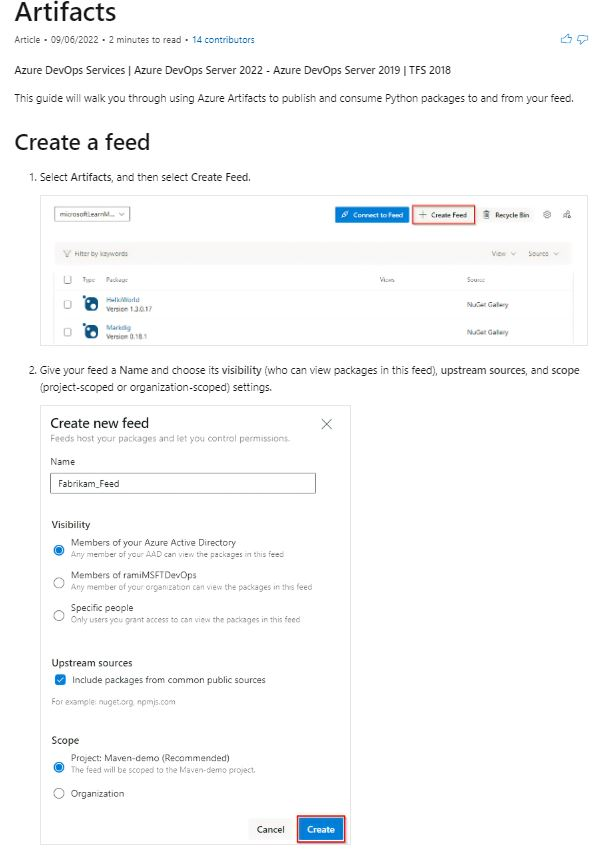

In [1]:
from IPython.display import Image
Image(filename='./img/001_CreateFeed.JPG') 

## Create a Personal Access Token.  

- Store the PAT in the key vault associated with your AML workspace
- Name the secret: **azuredevopspat**

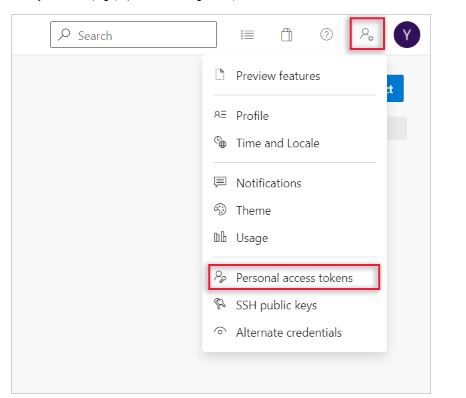

In [2]:
from IPython.display import Image
Image(filename='./img/002_CreatePAT.JPG')

## Connect to your feed

- In Azure DevOps Click on **Connect to feed**, then select pip.  Grab the index url and place that into your key vault under the variable: **indexurl**

- Also add your devOps Organization to your key vault under the variable: **devopsorganizationname**

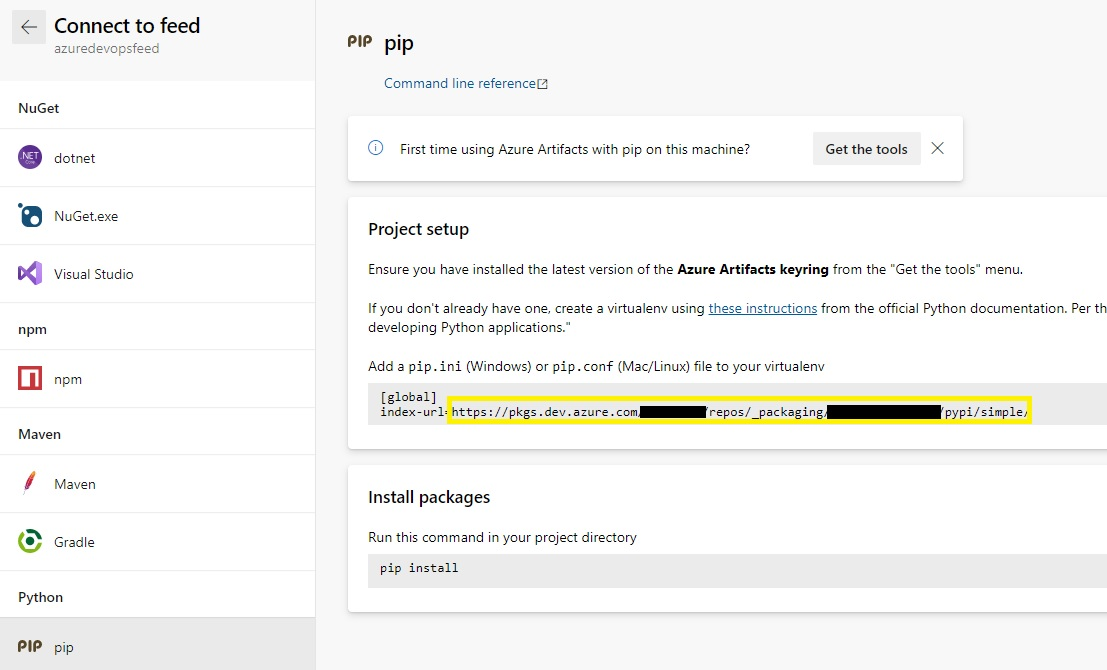

In [3]:
from IPython.display import Image
Image(filename='./img/003_geturl.JPG')

In [ ]:
from azureml.core import Workspace
ws = Workspace.from_config()
keyvault = ws.get_default_keyvault()
kv_results = keyvault.get_secret('azuredevopspat')
devops_organization_name = keyvault.get_secret('devopsorganizationname')
index_url = keyvault.get_secret('indexurl')

## Connect AML to DevOps Artifact Feed

In [ ]:
ws.set_connection(name="connection-1", 
   category = "PythonFeed",
   target = "https://pkgs.dev.azure.com/" + devops_organization_name, 
   authType = "PAT", 
   value = kv_results) 

## Create an environment 

- Include packages from the feed

In [ ]:
from azureml.core import Environment
from azureml.core.conda_dependencies import CondaDependencies

env = Environment(name="my-env")
cd = CondaDependencies()
cd.add_pip_package("pandas")
cd.set_pip_option("--extra-index-url " + index_url)
env.python.conda_dependencies=cd

## Register the environment so it can be built

In [ ]:
env.register(workspace=ws)
registered_env = Environment.get(ws, "my-env")
print(registered_env)

### Build Image

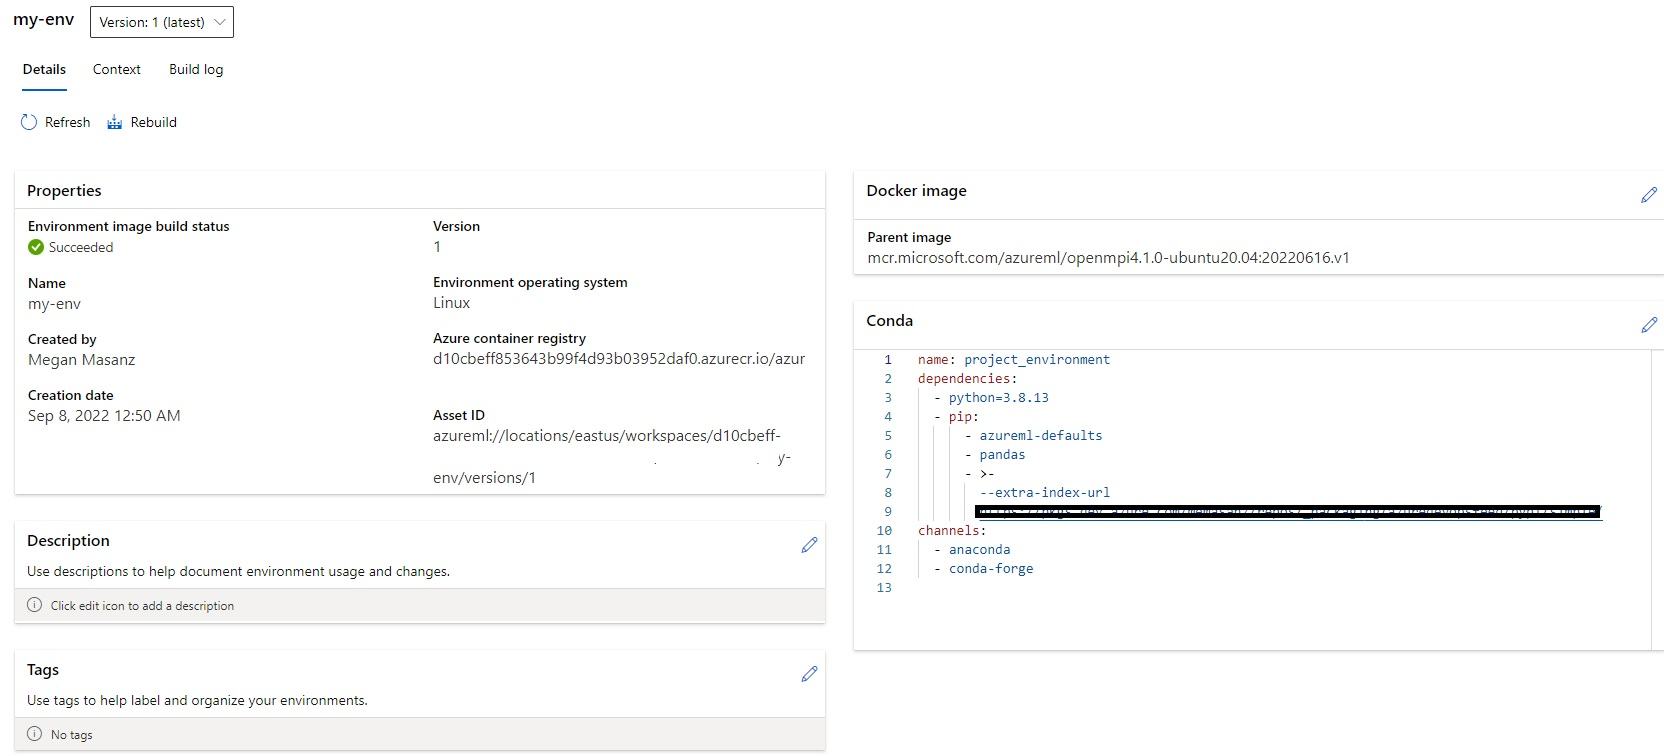

In [4]:
from IPython.display import Image
Image(filename='./img/004_environment_build.jpg')